LAB 2

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("dulieuxettuyendaihoc.csv")
df.head()

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,...,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,...,6.6,7.6,5.9,F,NaN,2NT,3.25,3.25,4.50,A1
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,...,6.6,6.1,4.4,M,NaN,1,6.00,4.00,3.50,C
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,...,7.9,8.1,4.6,M,NaN,1,5.00,6.75,4.00,C
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,...,7.1,7.3,7.4,M,NaN,1,4.25,4.25,5.25,D1
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,...,6.1,7.5,7.2,M,NaN,2NT,4.25,4.50,5.00,A


Phần 1: Thống kê dữ liệu

1

In [12]:
df_sorted_DH1 = df.sort_values(by="DH1", ascending=True) # Sắp xếp dữ liệu theo cột DH1 theo thứ tự tăng dần

df_sorted_DH1[["DH1"]].head() # Hiển thị 5 giá trị DH1 nhỏ nhất sau khi sắp xếp

,DH1
53,1.00
43,1.25
5,1.50
72,1.50
83,1.75


2

In [13]:
df_sorted_DH2_GT = df.sort_values(by=["GT", "DH2"], ascending=[True, True]) # Sắp xếp dữ liệu theo giới tính (GT) và điểm DH2, cả hai đều theo thứ tự tăng dần
df_sorted_DH2_GT[["GT", "DH2"]].head() # Hiển thị 5 dòng đầu tiên gồm giới tính và điểm DH2 sau khi sắp xếp

,GT,DH2
95,F,1.50
25,F,2.00
24,F,2.25
46,F,2.25
13,F,2.75


3

In [137]:
pivot_KT = df.pivot_table(
    values="DH1",                 # Chọn biến cần thống kê là điểm DH1
    index="KT",                   # Nhóm dữ liệu theo khối thi (KT)
    aggfunc=[                     # Các phép thống kê áp dụng cho DH1
        "count",                  # Số lượng thí sinh
        "sum",                    # Tổng điểm DH1
        "mean",                   # Giá trị trung bình
        "median",                 # Trung vị
        "min",                    # Giá trị nhỏ nhất
        "max",                    # Giá trị lớn nhất
        "std",                    # Độ lệch chuẩn
        lambda x: x.quantile(0.25),  # Q1 – tứ phân vị thứ nhất
        lambda x: x.quantile(0.50),  # Q2 – trung vị
        lambda x: x.quantile(0.75)   # Q3 – tứ phân vị thứ ba
    ]
)

pivot_KT.columns = [
    "count",   # Số lượng
    "sum",     # Tổng
    "mean",    # Trung bình
    "median",  # Trung vị
    "min",     # Nhỏ nhất
    "max",     # Lớn nhất
    "std",     # Độ lệch chuẩn
    "Q1",      # Tứ phân vị thứ nhất
    "Q2",      # Tứ phân vị thứ hai
    "Q3"       # Tứ phân vị thứ ba
]

pivot_KT


,count,sum,mean,median,min,max,std,Q1,Q2,Q3
KT,,,,,,,,,,
A,49,163.50,3.336735,3.25,1.00,6.50,1.274296,2.2500,3.25,4.250
A1,6,17.50,2.916667,3.00,2.00,4.25,0.861201,2.1875,3.00,3.250
B,9,29.50,3.277778,3.50,1.75,4.50,0.823905,3.2500,3.50,3.750
C,14,79.25,5.660714,5.25,4.75,7.00,0.812209,5.0625,5.25,6.375
D1,22,84.25,3.829545,3.75,1.25,6.75,1.370146,3.0000,3.75,4.875


4

In [15]:
pivot_KT_KV = df.pivot_table(
    values="DH1", # Biến cần thống kê
    index=["KT", "KV"], # Nhóm theo khối thi và khu vực
    aggfunc=["count","sum","mean","median","min","max","std", # Các chỉ tiêu thống kê cho DH1
             lambda x: x.quantile(0.25),
             lambda x: x.quantile(0.50),
             lambda x: x.quantile(0.75)]
)

pivot_KT_KV


count    sum      mean median   min   max       std <lambda>         \
         DH1    DH1       DH1    DH1   DH1   DH1       DH1      DH1    DH1   
KT KV                                                                        
A  1      29  93.75  3.232759  3.250  1.00  6.50  1.369194   2.0000  3.250   
   2       9  31.75  3.527778  3.500  2.00  6.25  1.427653   2.2500  3.500   
   2NT    11  38.00  3.454545  3.500  2.00  4.75  0.913908   2.8750  3.500   
A1 1       2   4.75  2.375000  2.375  2.00  2.75  0.530330   2.1875  2.375   
   2NT     4  12.75  3.187500  3.250  2.00  4.25  0.921389   2.9375  3.250   
B  1       8  25.75  3.218750  3.375  1.75  4.50  0.860207   3.0000  3.375   
   2NT     1   3.75  3.750000  3.750  3.75  3.75       NaN   3.7500  3.750   
C  1       8  43.50  5.437500  5.250  4.75  7.00  0.728869   5.0000  5.250   
   2       2  11.50  5.750000  5.750  5.00  6.50  1.060660   5.3750  5.750   
   2NT     4  24.25  6.062500  6.000  5.25  7.00  0.943729   5.2500  6.000   
D1 1      13  46.75  3.596154  3.500  1.50  5.75  1.264658   2.7500  3.500   
   2       8  33.75  4.218750  4.500  1.25  6.75  1.617082   3.5625  4.500   
   2NT     1   3.75  3.750000  3.750  3.75  3.75       NaN   3.7500  3.750   

                
           DH1  
KT KV           
A  1    4.2500  
   2    4.2500  
   2NT  4.1250  
A1 1    2.5625  
   2NT  3.5000  
B  1    3.5625  
   2NT  3.7500  
C  1    5.4375  
   2    6.1250  
   2NT  6.8125  
D1 1    4.2500  
   2    5.0000  
   2NT  3.7500

5

In [16]:
pivot_KT_KV_DT = df.pivot_table(
    values="DH1", # Biến cần thống kê
    index=["KT", "KV", "DT"], # Nhóm theo khối thi, khu vực và dân tộc
    aggfunc=["count","sum","mean","median","min","max","std", # Các chỉ tiêu thống kê cho DH1
             lambda x: x.quantile(0.25),
             lambda x: x.quantile(0.50),
             lambda x: x.quantile(0.75)]
)

pivot_KT_KV_DT


count   sum  mean median   min   max <lambda>            
            DH1   DH1   DH1    DH1   DH1   DH1      DH1   DH1   DH1
KT KV DT                                                           
A  2  6.0     1  4.25  4.25   4.25  4.25  4.25     4.25  4.25  4.25
D1 1  1.0     1  3.00  3.00   3.00  3.00  3.00     3.00  3.00  3.00
   2  1.0     1  1.25  1.25   1.25  1.25  1.25     1.25  1.25  1.25

PHẦN 2: TRÌNH BÀY DỮ LIỆU

1 Trình bày biến GT

In [17]:
freq_GT = df["GT"].value_counts() # Đếm tần số của từng giới tính
ratio_GT = df["GT"].value_counts(normalize=True) # Tính tần suất (tỷ lệ) của từng giới tính

pd.DataFrame({"Tần số": freq_GT, "Tần suất": ratio_GT}) # Tạo bảng trình bày kết quả


,Tần số,Tần suất
GT,,
M,52,0.52
F,48,0.48


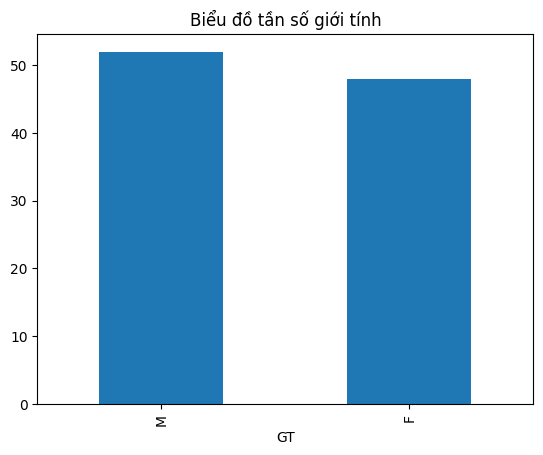

In [18]:
freq_GT.plot(kind="bar") # Vẽ biểu đồ cột biểu diễn tần số giới tính
plt.title("Biểu đồ tần số giới tính") # Đặt tiêu đề cho biểu đồ
plt.show() # Hiển thị biểu đồ


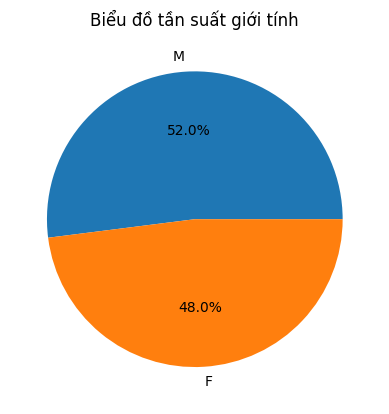

In [19]:
freq_GT.plot(kind="pie", autopct="%1.1f%%") # Vẽ biểu đồ tròn thể hiện tần suất giới tính
plt.title("Biểu đồ tần suất giới tính") # Đặt tiêu đề cho biểu đồ
plt.ylabel("") # Ẩn nhãn trục tung cho gọn
plt.show() # Hiển thị biểu đồ


2 Trình bày US_TBM1, US_TBM2, US_TBM3

In [37]:
df[["US_TBM1","US_TBM2","US_TBM3"]].describe()

,US_TBM1,US_TBM2,US_TBM3
count,100.000000,100.000000,100.000000
mean,6.124500,6.437375,6.396750
std,0.977188,0.930806,0.935591
min,4.137500,4.312500,3.850000
25%,5.356250,5.621875,5.750000
50%,6.281250,6.456250,6.437500
75%,6.859375,7.156250,7.103125
max,8.075000,8.512500,8.225000


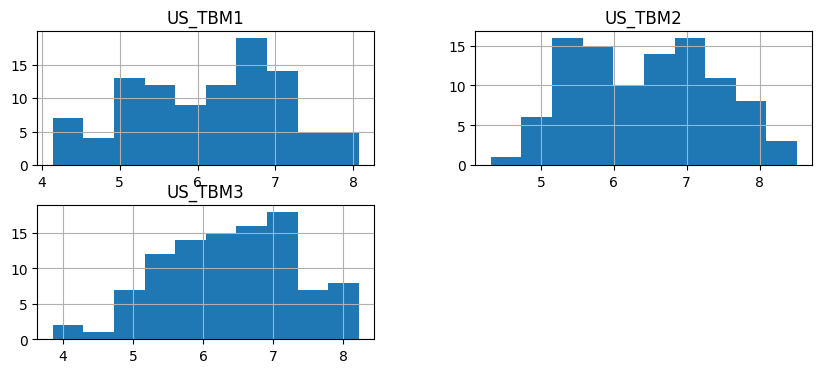

In [38]:
df[["US_TBM1","US_TBM2","US_TBM3"]].hist(bins=10, figsize=(10,4))
plt.show()


3 Trình bày biến DT với học sinh nam

In [45]:
df_male = df[df['GT'] == 'M'] # Lọc dữ liệu các bản ghi có giới tính là 'M' (Nam)

if not df_male.empty: # Kiểm tra xem dữ liệu lọc có rỗng hay không
    print(f"Có {len(df_male)} bản ghi có giới tính là 'M'.") # In số lượng bản ghi
    display(df_male.head()) # Hiển thị 5 dòng đầu tiên của dữ liệu đã lọc
else:
    print("Không có bản ghi nào có giới tính là 'M'.") # Thông báo nếu không có dữ liệu

Có 52 bản ghi có giới tính là 'M'.


,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,...,GT,DT,KV,DH1,DH2,DH3,KT,US_TBM1,US_TBM2,US_TBM3
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,...,M,NaN,1,6.00,4.00,3.50,C,4.5125,5.3750,4.6875
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,...,M,NaN,1,5.00,6.75,4.00,C,5.9750,5.4375,4.7500
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,...,M,NaN,1,4.25,4.25,5.25,D1,6.2625,5.3125,6.0875
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,...,M,NaN,2NT,4.25,4.50,5.00,A,6.5625,6.4625,7.1000
5,6,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,...,M,NaN,1,1.50,4.00,6.00,D1,7.9125,8.5125,7.9875


4 Trình bày KV với học sinh:

In [58]:
print(f"Số bản ghi có GT == 'M': {df[df['GT'] == 'M'].shape[0]}") # Đếm số bản ghi có giới tính là Nam
print(f"Số bản ghi có DT == 'Kinh': {df[df['DT'] == 'Kinh'].shape[0]}") # Đếm số bản ghi thuộc dân tộc Kinh
print(f"Số bản ghi có DH1 >= 5: {df[df['DH1'] >= 5].shape[0]}") # Đếm số bản ghi có điểm DH1 từ 5 trở lên
print(f"Số bản ghi có DH2 >= 4: {df[df['DH2'] >= 4].shape[0]}") # Đếm số bản ghi có điểm DH2 từ 4 trở lên
print(f"Số bản ghi có DH3 >= 4: {df[df['DH3'] >= 4].shape[0]}") # Đếm số bản ghi có điểm DH2 từ 4 trở lên

Số bản ghi có GT == 'M': 52
Số bản ghi có DT == 'Kinh': 0
Số bản ghi có DH1 >= 5: 23
Số bản ghi có DH2 >= 4: 65
Số bản ghi có DH3 >= 4: 85


5 Trình bày DH1, DH2, DH3 ≥ 5 thuộc KV = 2NT

In [62]:
df_temp = df[(df['KV'] == '2NT')] # Lọc các bản ghi thuộc khu vực 2NT
print(f"Số bản ghi có KV == '2NT': {df_temp.shape[0]}") # Đếm số bản ghi ban đầu

df_temp = df_temp[df_temp['DH1'] >= 5] # Giữ các bản ghi có DH1 ≥ 5
print(f"... và DH1 >= 5: {df_temp.shape[0]}") # Số bản ghi còn lại

df_temp = df_temp[df_temp['DH2'] >= 5] # Giữ các bản ghi có DH2 ≥ 5
print(f"... và DH2 >= 5: {df_temp.shape[0]}") # Số bản ghi còn lại

df_temp = df_temp[df_temp['DH3'] >= 5] # Giữ các bản ghi có DH3 ≥ 5
print(f"... và DH3 >= 5: {df_temp.shape[0]}") # Số bản ghi cuối cùng thỏa điều kiện

Số bản ghi có KV == '2NT': 21
... và DH1 >= 5: 4
... và DH2 >= 5: 3
... và DH3 >= 5: 1


Phần 3: Trực quan hóa dữ liệu theo nhóm phân loại

1 Học sinh nữ – XL1, XL2, XL3 (unstacked)

In [84]:
xl1_counts_nu = df_nu['XL1'].value_counts() # Đếm số lượng học sinh nữ theo xếp loại XL1
xl2_counts_nu = df_nu['XL2'].value_counts() # Đếm số lượng học sinh nữ theo xếp loại XL2
xl3_counts_nu = df_nu['XL3'].value_counts() # Đếm số lượng học sinh nữ theo xếp loại XL3

performance_data_nu = pd.DataFrame({ # Gộp dữ liệu xếp loại vào một DataFrame
    'XL1': xl1_counts_nu,
    'XL2': xl2_counts_nu,
    'XL3': xl3_counts_nu
}).fillna(0).astype(int) # Thay NaN bằng 0 và ép kiểu số nguyên

order = ['Giỏi', 'Khá', 'Trung Bình', 'Yếu'] # Thứ tự xếp loại mong muốn
performance_data_nu = performance_data_nu.reindex(order, fill_value=0) # Sắp xếp lại theo thứ tự

performance_data_nu

,XL1,XL2,XL3
Giỏi,1,1,1
Khá,26,30,29
Trung Bình,17,16,17
Yếu,4,1,1


2 KQXT – khối A, A1, B – KV 1,2


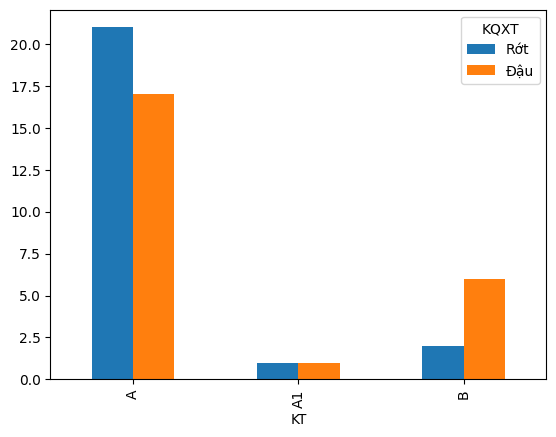

In [89]:
df_filt = df[ # Lọc dữ liệu theo điều kiện
    df["KT"].isin(["A","A1","B"]) & # Chỉ giữ các khối thi A, A1, B
    df["KV"].isin(["1","2"]) # Chỉ giữ khu vực 1 và 2
]

pd.crosstab(df_filt["KT"], df_filt["KQXT"]).plot(kind="bar") # Vẽ biểu đồ cột kết quả xét tuyển theo khối thi
plt.show()


3 Số lượng thí sinh từng KV theo khối thi

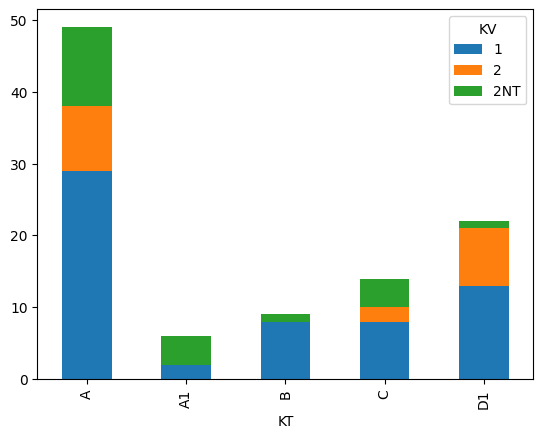

In [90]:
pd.crosstab(df["KT"], df["KV"]).plot(kind="bar", stacked=True) # Vẽ biểu đồ cột chồng số lượng thí sinh theo khu vực trên từng khối thi
plt.show()


4 Đậu / rớt theo khối thi

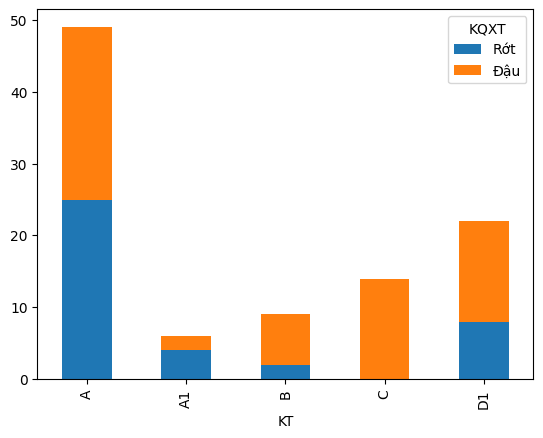

In [91]:
pd.crosstab(df["KT"], df["KQXT"]).plot(kind="bar", stacked=True) # Vẽ biểu đồ cột chồng thể hiện số lượng thí sinh đậu/rớt theo từng khối thi
plt.show()


5 Đậu / rớt theo khu vực

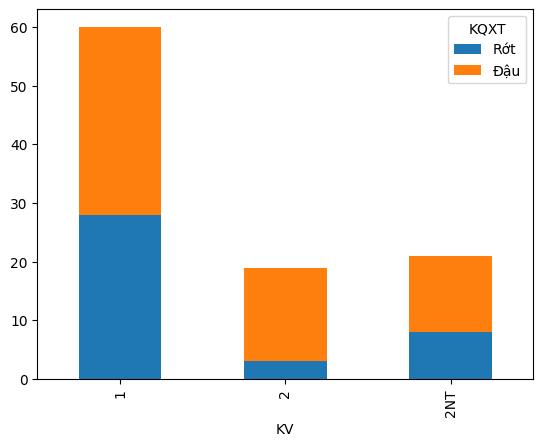

In [92]:
pd.crosstab(df["KV"], df["KQXT"]).plot(kind="bar", stacked=True)
plt.show()


6 Đậu / rớt theo dân tộc

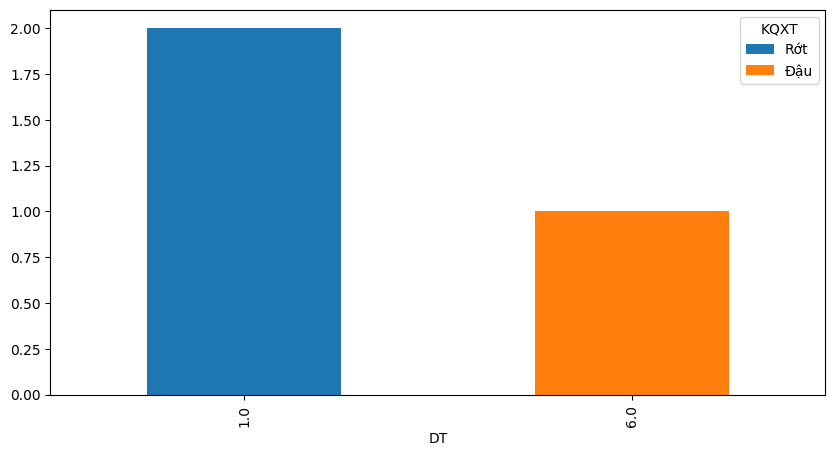

In [93]:
pd.crosstab(df["DT"], df["KQXT"]).plot(kind="bar", stacked=True, figsize=(10,5))
plt.show()


7 Đậu / rớt theo giới tính

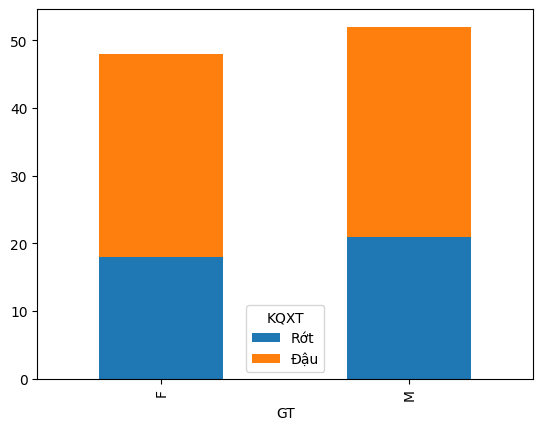

In [94]:
pd.crosstab(df["GT"], df["KQXT"]).plot(kind="bar", stacked=True)
plt.show()


Phần 4: Trực quan hóa dữ liệu nâng cao

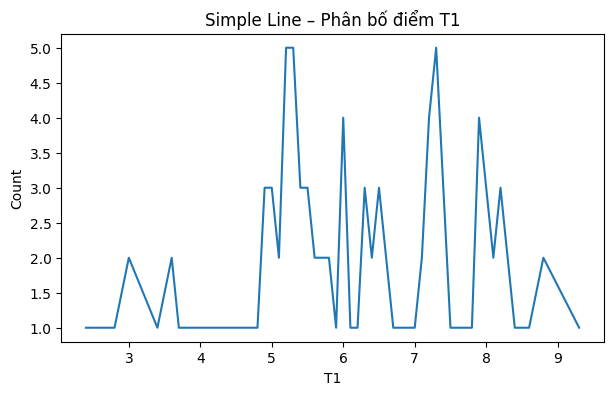

In [96]:
t1_count = df["T1"].value_counts().sort_index() # Đếm tần số từng giá trị T1 và sắp xếp theo thứ tự

plt.figure(figsize=(7,4))  # Tạo khung hình với kích thước phù hợp
plt.plot(t1_count.index, t1_count.values) # Vẽ biểu đồ đường: trục X là T1, trục Y là số lượng
plt.xlabel("T1")  # Nhãn trục hoành
plt.ylabel("Count") # Nhãn trục tung (tần số)
plt.title("Simple Line – Phân bố điểm T1") # Tiêu đề biểu đồ
plt.show()



2 Tạo biến phân loại phanloaiT1

In [100]:
def phanloai_t1(x): # Hàm phân loại điểm T1 theo mức học lực
    if x < 5:
        return "Kem"
    elif x < 7:
        return "Trungbinh"
    elif x < 8:
        return "Kha"
    else:
        return "Gioi"

df["phanloaiT1"] = df["T1"].apply(phanloai_t1) # Tạo cột phân loại T1 dựa trên điểm T1


3 Bảng tần số phanloaiT1

In [101]:
df["phanloaiT1"].value_counts()


,count
phanloaiT1,
Trungbinh,46
Kem,23
Kha,19
Gioi,12


4 MULTIPLE LINE – T1 theo phanloaiT1

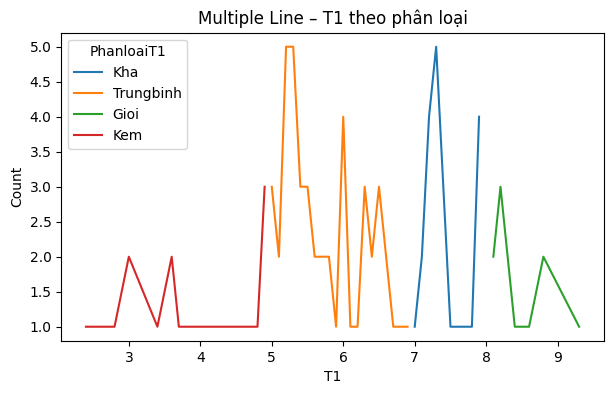

In [102]:
plt.figure(figsize=(7,4)) # Tạo khung hình cho biểu đồ

for loai in df["phanloaiT1"].unique(): # Lặp qua từng nhóm phân loại T1
    temp = df[df["phanloaiT1"] == loai]["T1"].value_counts().sort_index() # Đếm tần số điểm T1 trong từng nhóm
    plt.plot(temp.index, temp.values, label=loai) # Vẽ đường biểu diễn cho từng nhóm

plt.xlabel("T1")
plt.ylabel("Count")
plt.title("Multiple Line – T1 theo phân loại")
plt.legend(title="PhanloaiT1")
plt.show()


5 DROP-LINE – T1 theo phanloaiT1

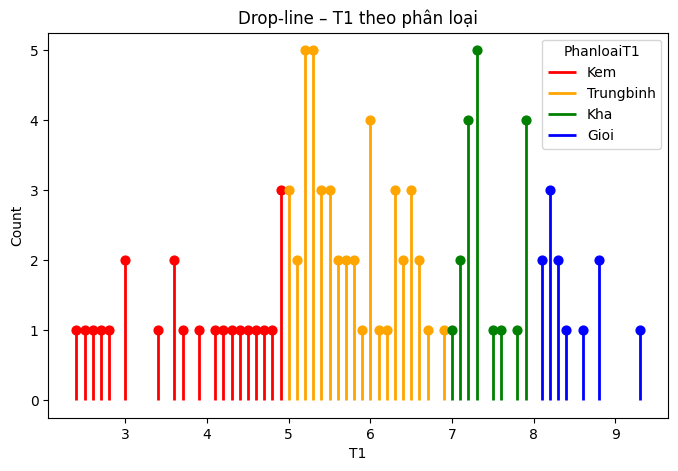

Color map defined successfully.


In [109]:
color_map = { # Bản đồ màu cho từng mức phân loại T1
    'Kem': 'red',
    'Trungbinh': 'orange',
    'Kha': 'green',
    'Gioi': 'blue'
}

print("Color map defined successfully.")

plt.figure(figsize=(8,5)) # Tạo khung hình biểu đồ

for loai in ["Kem", "Trungbinh", "Kha", "Gioi"]: # Duyệt từng nhóm phân loại
    temp = (
        df[df["phanloaiT1"] == loai]["T1"]
        .value_counts()
        .sort_index()
    ) # Đếm tần số T1 theo từng nhóm

    plt.vlines(  # Vẽ các đường thẳng đứng (drop-line)
        x=temp.index,
        ymin=0,
        ymax=temp.values,
        color=color_map[loai], # Mỗi nhóm một màu
        linewidth=2,
        label=loai
    )

    plt.scatter( # Vẽ điểm ở đầu mỗi drop-line
        temp.index,
        temp.values,
        color=color_map[loai],
        s=40
    )

plt.xlabel("T1")
plt.ylabel("Count")
plt.title("Drop-line – T1 theo phân loại")
plt.legend(title="PhanloaiT1")
plt.show()

Phần 5: Mô tả dữ liệu và khảo sát dạng phân phối


1

a Độ tập trung & phân tán của T1

In [110]:
df["T1"].describe() # Thống kê mô tả cơ bản cho biến T1 (count, mean, std, min, các tứ phân vị, max)


,T1
count,100.000000
mean,5.946000
std,1.608338
min,2.400000
25%,5.000000
50%,5.850000
75%,7.200000
max,9.300000


In [112]:
mean = df["T1"].mean() # Giá trị trung bình của T1 (độ tập trung)
median = df["T1"].median() # Trung vị của T1 (độ tập trung, ít bị ảnh hưởng bởi ngoại lệ)
std = df["T1"].std() # Độ lệch chuẩn của T1 (mức độ phân tán)
var = df["T1"].var() # Phương sai của T1 (độ phân tán)
skew = df["T1"].skew() # Độ lệch phân phối (skewness)
kurt = df["T1"].kurt() # Độ nhọn của phân phối (kurtosis)

mean, median, std, var, skew, kurt


(np.float64(5.946000000000001),
 5.85,
 1.6083381221470552,
 2.586751515151516,
 np.float64(-0.17824317486762223),
 np.float64(-0.48010360836580634))

b Box-Plot & 10 đại lượng

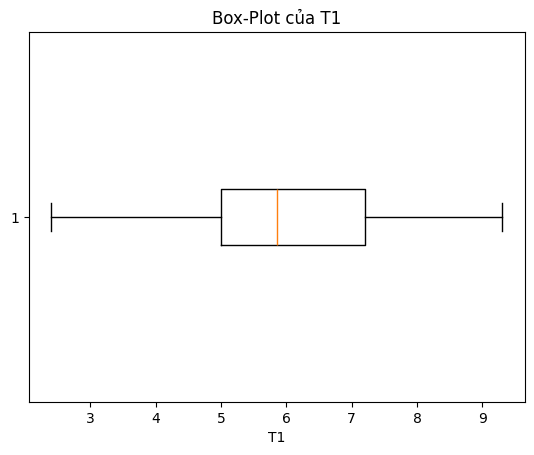

In [113]:
plt.boxplot(df["T1"], vert=False) # Vẽ Box-Plot cho biến T1 (hiển thị phân bố và ngoại lệ)
plt.title("Box-Plot của T1")
plt.xlabel("T1")
plt.show()


c Hình dáng lệch của phân phối T1

In [114]:
mean, median # Mean: giá trị trung bình | Median: trung vị của biến T1


(np.float64(5.946000000000001), 5.85)

d Histogram - hình dáng phân phối

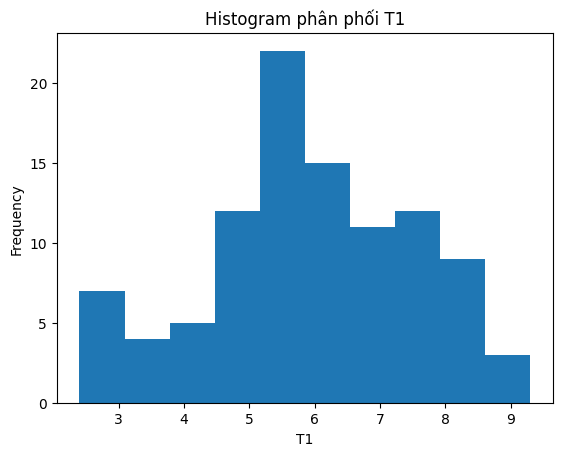

In [115]:
plt.hist(df["T1"], bins=10) # Vẽ Histogram thể hiện dạng phân phối của biến T1
plt.xlabel("T1")  # Trục hoành
plt.ylabel("Frequency") # Trục tung
plt.title("Histogram phân phối T1")
plt.show()


e Độ lệch & độ nhọn

In [116]:
skew, kurt


(np.float64(-0.17824317486762223), np.float64(-0.48010360836580634))

f QQ-Plot – kiểm chứng phân phối chuẩn

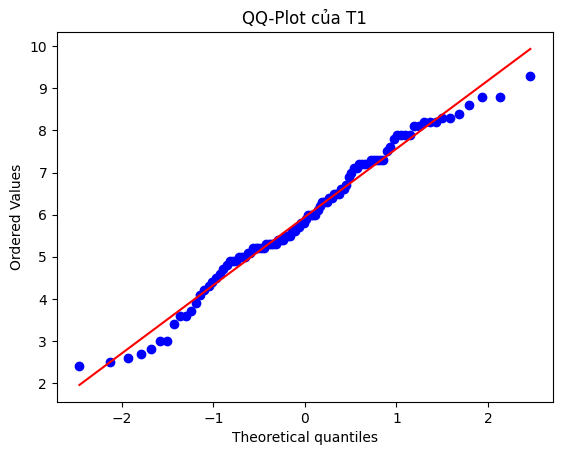

In [118]:
import scipy.stats as stats # Thư viện dùng cho kiểm định và phân phối thống kê
stats.probplot(df["T1"], dist="norm", plot=plt) # Vẽ QQ-Plot để kiểm chứng T1 có phân phối chuẩn hay không
plt.title("QQ-Plot của T1")
plt.show()


g Nhận xét tổng hợp (chép vào báo cáo)

Phân phối của biến T1 không hoàn toàn tuân theo phân phối chuẩn. Biểu đồ Histogram và QQ-Plot cho thấy dữ liệu có xu hướng lệch, các điểm không nằm hoàn toàn trên đường chuẩn. Do đó, T1 chỉ xấp xỉ phân phối chuẩn.

2 Phân phối T1 theo từng nhóm phanloaiT1

Box-Plot theo phân lớp

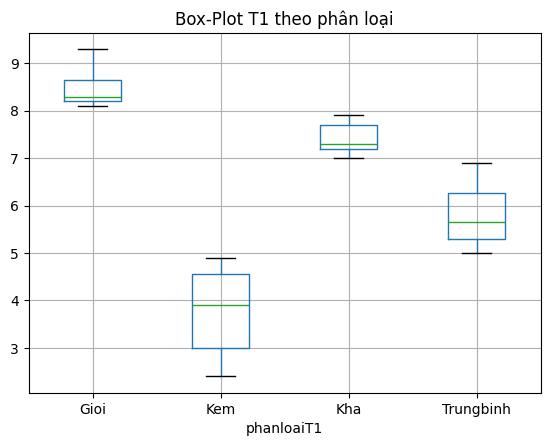

In [119]:
df.boxplot(column="T1", by="phanloaiT1") # Vẽ Box-Plot của T1 theo từng nhóm phân loại phanloaiT1
plt.title("Box-Plot T1 theo phân loại")
plt.suptitle("")  # Xóa tiêu đề mặc định của pandas
plt.show()


Histogram theo phân lớp

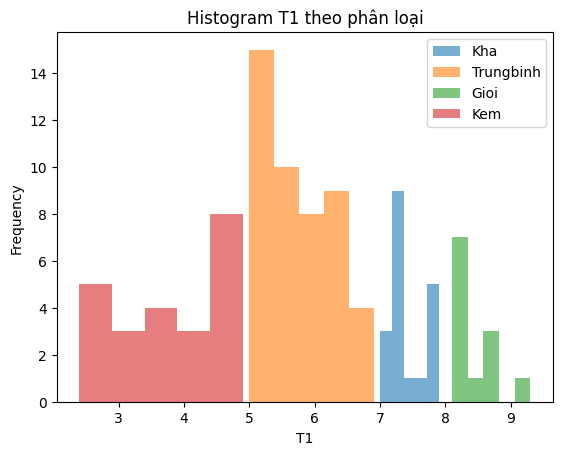

In [138]:
for loai in df["phanloaiT1"].unique():                 # Lặp qua từng nhóm phân loại T1
    plt.hist(
        df[df["phanloaiT1"] == loai]["T1"],            # Dữ liệu T1 của từng nhóm
        bins=5,                                        # Số khoảng Histogram
        alpha=0.6,                                     # Độ trong suốt để không che nhau
        label=loai                                     # Nhãn cho từng nhóm phân loại
    )

plt.legend()
plt.title("Histogram T1 theo phân loại")
plt.xlabel("T1")
plt.ylabel("Frequency")
plt.show()


QQ-Plot theo phân lớp

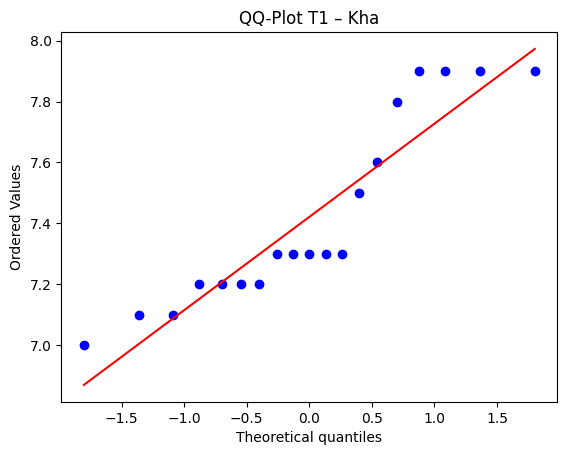

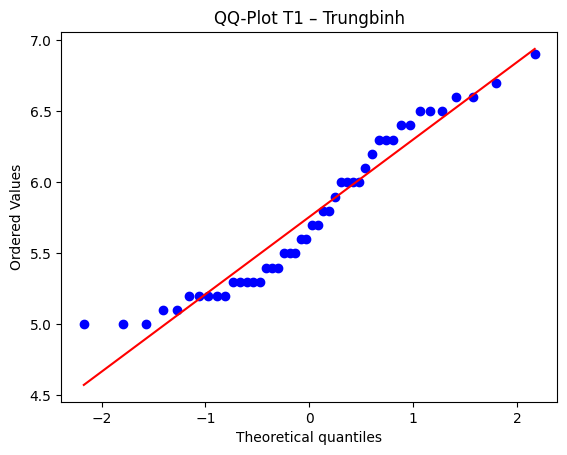

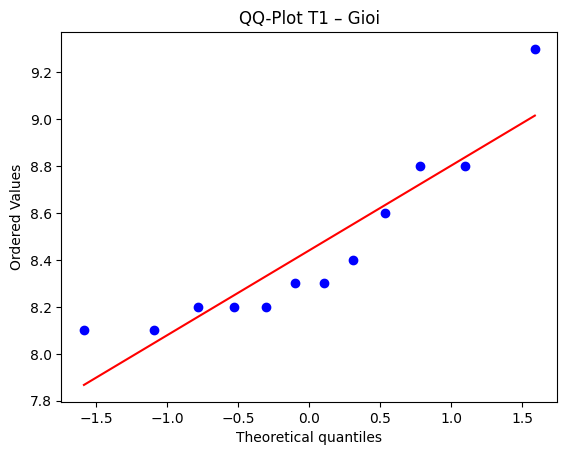

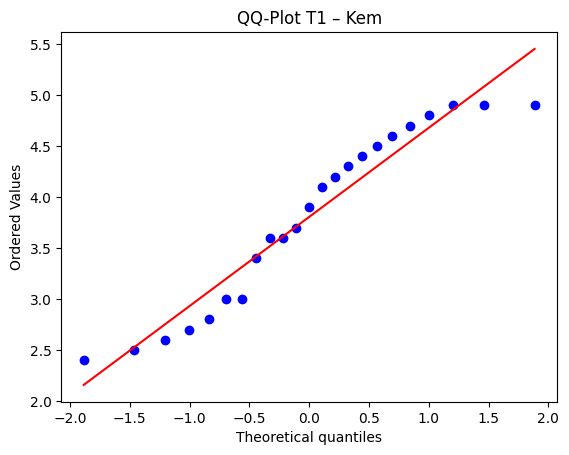

In [121]:
for loai in df["phanloaiT1"].unique():
    stats.probplot(df[df["phanloaiT1"] == loai]["T1"], dist="norm", plot=plt)
    plt.title(f"QQ-Plot T1 – {loai}")
    plt.show()


3 Tương quan giữa DH1 và T1

Covariance & Correlation

In [128]:
df[["T1","DH1"]].cov() # Tính ma trận hiệp phương sai giữa T1 và DH1

,T1,DH1
T1,2.586752,0.112838
DH1,0.112838,2.028939


In [129]:
df[["T1","DH1"]].corr() # Tính ma trận hệ số tương quan (Pearson) giữa T1 và DH1

,T1,DH1
T1,1.000000,0.049254
DH1,0.049254,1.000000


Scatter Plot

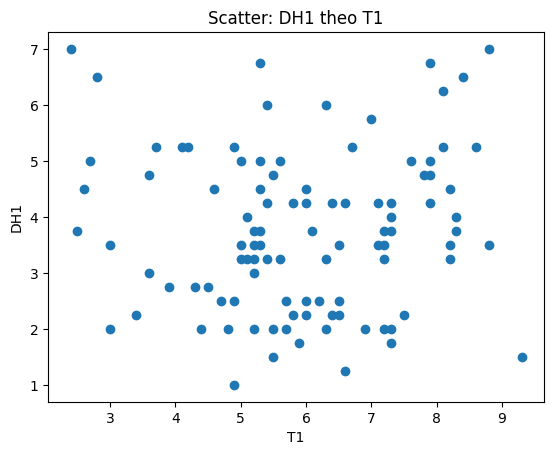

In [130]:
plt.scatter(df["T1"], df["DH1"])
plt.xlabel("T1")
plt.ylabel("DH1")
plt.title("Scatter: DH1 theo T1")
plt.show()


4 Tương quan DH1 – T1 theo từng khu vực (KV)

KV 2NT – Correlation: 0.2784691939744977


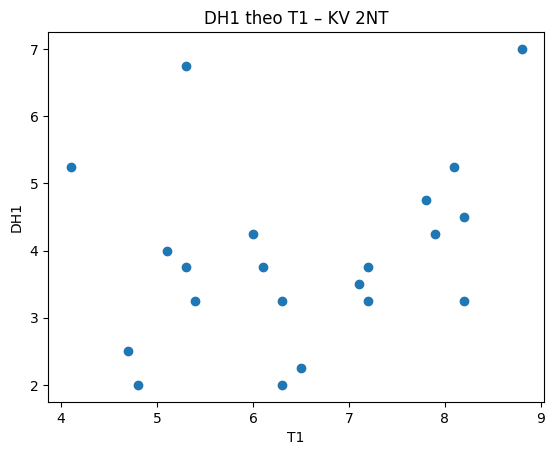

KV 1 – Correlation: -0.07984936277357216


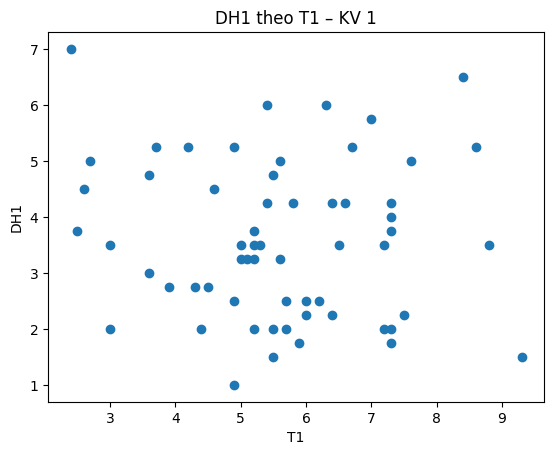

KV 2 – Correlation: 0.06174287535779777


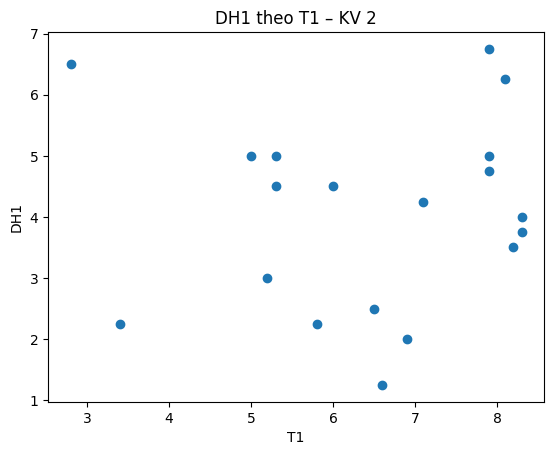

In [132]:
for kv in df["KV"].unique():  # Lặp qua từng nhóm khu vực (KV)
    temp = df[df["KV"] == kv] # Lọc dữ liệu theo từng khu vực
    corr = temp["T1"].corr(temp["DH1"]) # Tính hệ số tương quan T1 – DH1 trong từng KV
    print(f"KV {kv} – Correlation:", corr) # In giá trị tương quan

    plt.scatter(temp["T1"], temp["DH1"])
    plt.title(f"DH1 theo T1 – KV {kv}")
    plt.xlabel("T1")
    plt.ylabel("DH1")
    plt.show()


5 Tương quan giữa DH1, DH2, DH3

In [133]:
df[["DH1","DH2","DH3"]].corr() # Tính ma trận hệ số tương quan (Pearson) giữa DH1, DH2 và DH3


,DH1,DH2,DH3
DH1,1.000000,0.035154,0.018731
DH2,0.035154,1.000000,-0.091523
DH3,0.018731,-0.091523,1.000000


Scatter giữa các biến

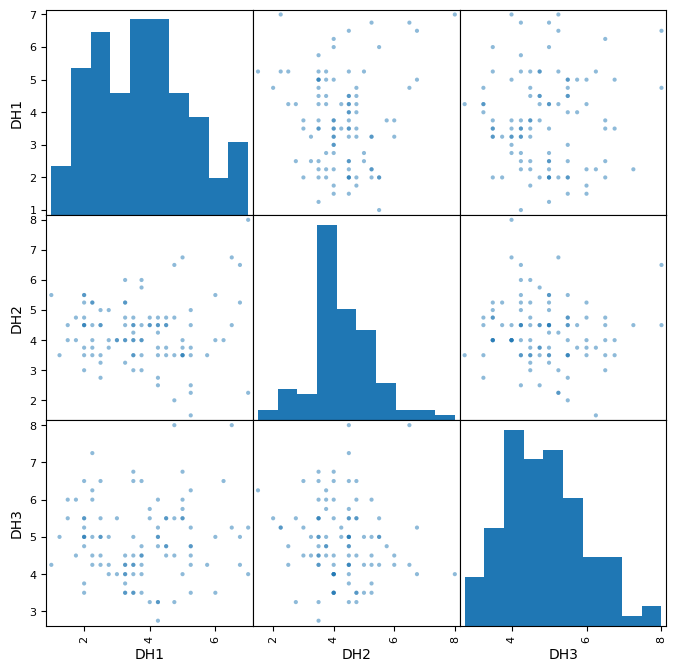

In [135]:
pd.plotting.scatter_matrix(
    df[["DH1","DH2","DH3"]], # Chọn các biến DH1, DH2, DH3 để khảo sát mối quan hệ
    figsize=(8,8) # Kích thước ma trận biểu đồ
)
plt.show()
